##USING RANDOM FOREST CLASSIFIER

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,mean_squared_error,mean_absolute_error,r2_score

In [2]:
from google.colab import files
uploaded=files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data.csv


In [3]:
df=pd.read_csv(r'healthcare-dataset-stroke-data.csv')

In [4]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:
df.dropna(inplace=True)

In [6]:
x=df[['age','hypertension','heart_disease','avg_glucose_level','bmi']]

In [7]:
x

,age,hypertension,heart_disease,avg_glucose_level,bmi
0,67.0,0,1,228.69,36.6
2,80.0,0,1,105.92,32.5
3,49.0,0,0,171.23,34.4
4,79.0,1,0,174.12,24.0
5,81.0,0,0,186.21,29.0
...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6
5106,81.0,0,0,125.20,40.0
5107,35.0,0,0,82.99,30.6
5108,51.0,0,0,166.29,25.6


In [8]:
y=df[['stroke']]

In [9]:
y

,stroke
0,1
2,1
3,1
4,1
5,1
...,...
5104,0
5106,0
5107,0
5108,0


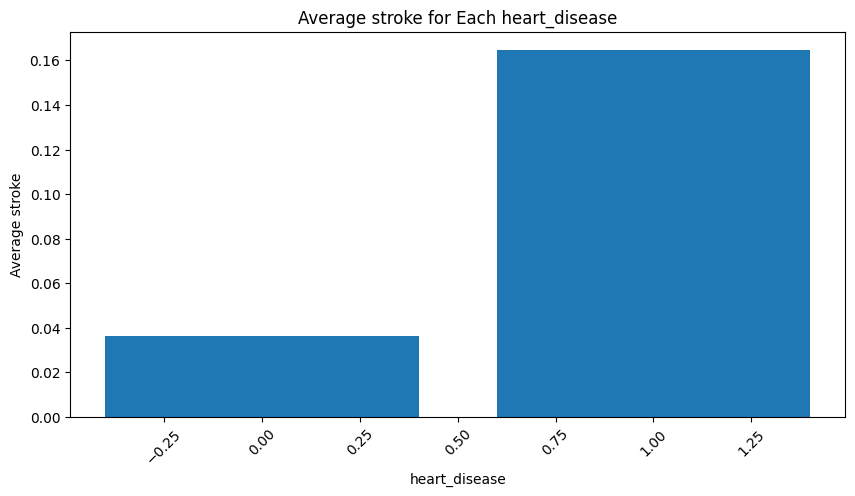

In [26]:
grouped = df.groupby('heart_disease')['stroke'].mean().reset_index()
plt.figure(figsize=(10,5))
plt.bar(grouped['heart_disease'], grouped['stroke'])
plt.title("Average stroke for Each heart_disease")
plt.xlabel("heart_disease")
plt.ylabel("Average stroke")
plt.xticks(rotation=45)
plt.show()

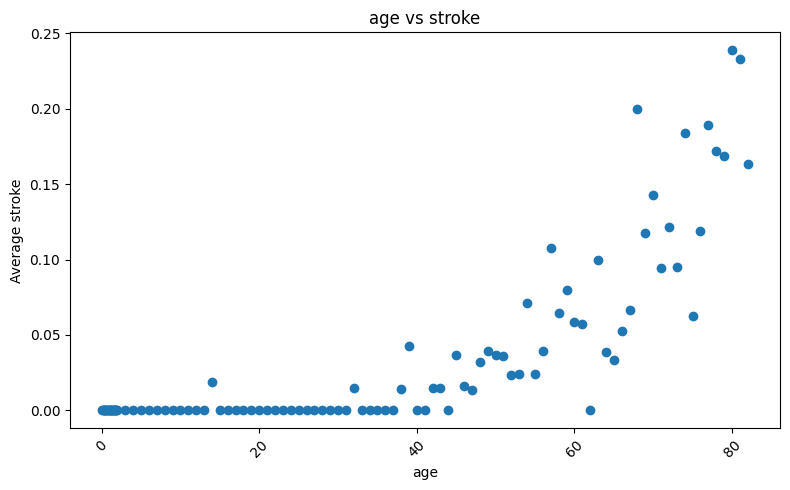

In [27]:
grouped = df.groupby('age')['stroke'].mean().reset_index()
plt.figure(figsize=(8,5))
plt.scatter(grouped['age'], grouped['stroke'])
plt.title("age vs stroke")
plt.xlabel("age")
plt.ylabel("Average stroke")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

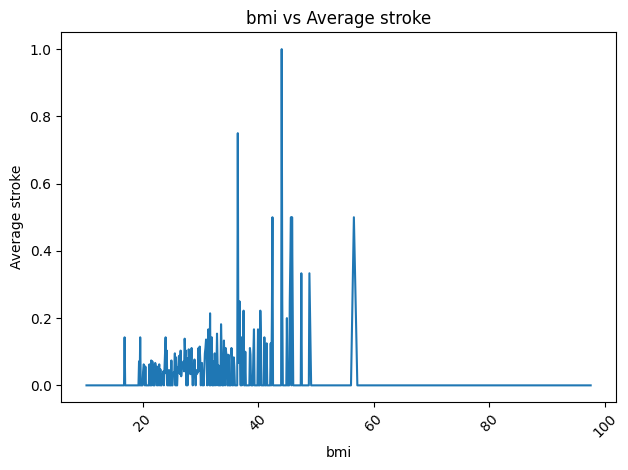

In [28]:
grouped = df.groupby('bmi')['stroke'].mean().reset_index()
plt.plot(grouped['bmi'], grouped['stroke'])
plt.title("bmi vs Average stroke")
plt.xlabel("bmi")
plt.ylabel("Average stroke")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

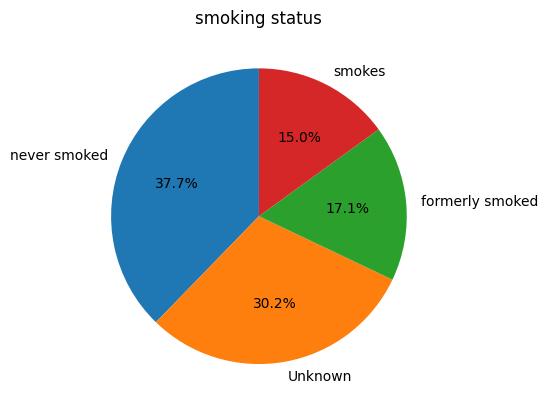

In [29]:
smoking_status = df['smoking_status'].value_counts()
plt.title("smoking status")
plt.pie(smoking_status, labels=smoking_status.index, autopct='%1.1f%%',startangle=90)
plt.show()

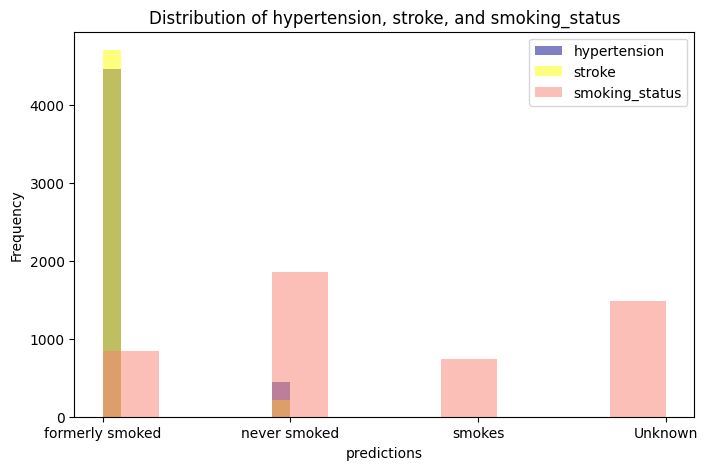

In [30]:
plt.figure(figsize=(8,5))
plt.hist(df['hypertension'], bins=10, alpha=0.5, label='hypertension', color='darkblue')
plt.hist(df['stroke'], bins=10, alpha=0.5, label='stroke', color='yellow')
plt.hist(df['smoking_status'], bins=10, alpha=0.5, label='smoking_status', color='salmon')
plt.xlabel("predictions")
plt.ylabel("Frequency")
plt.title("Distribution of hypertension, stroke, and smoking_status")
plt.legend()
plt.show()

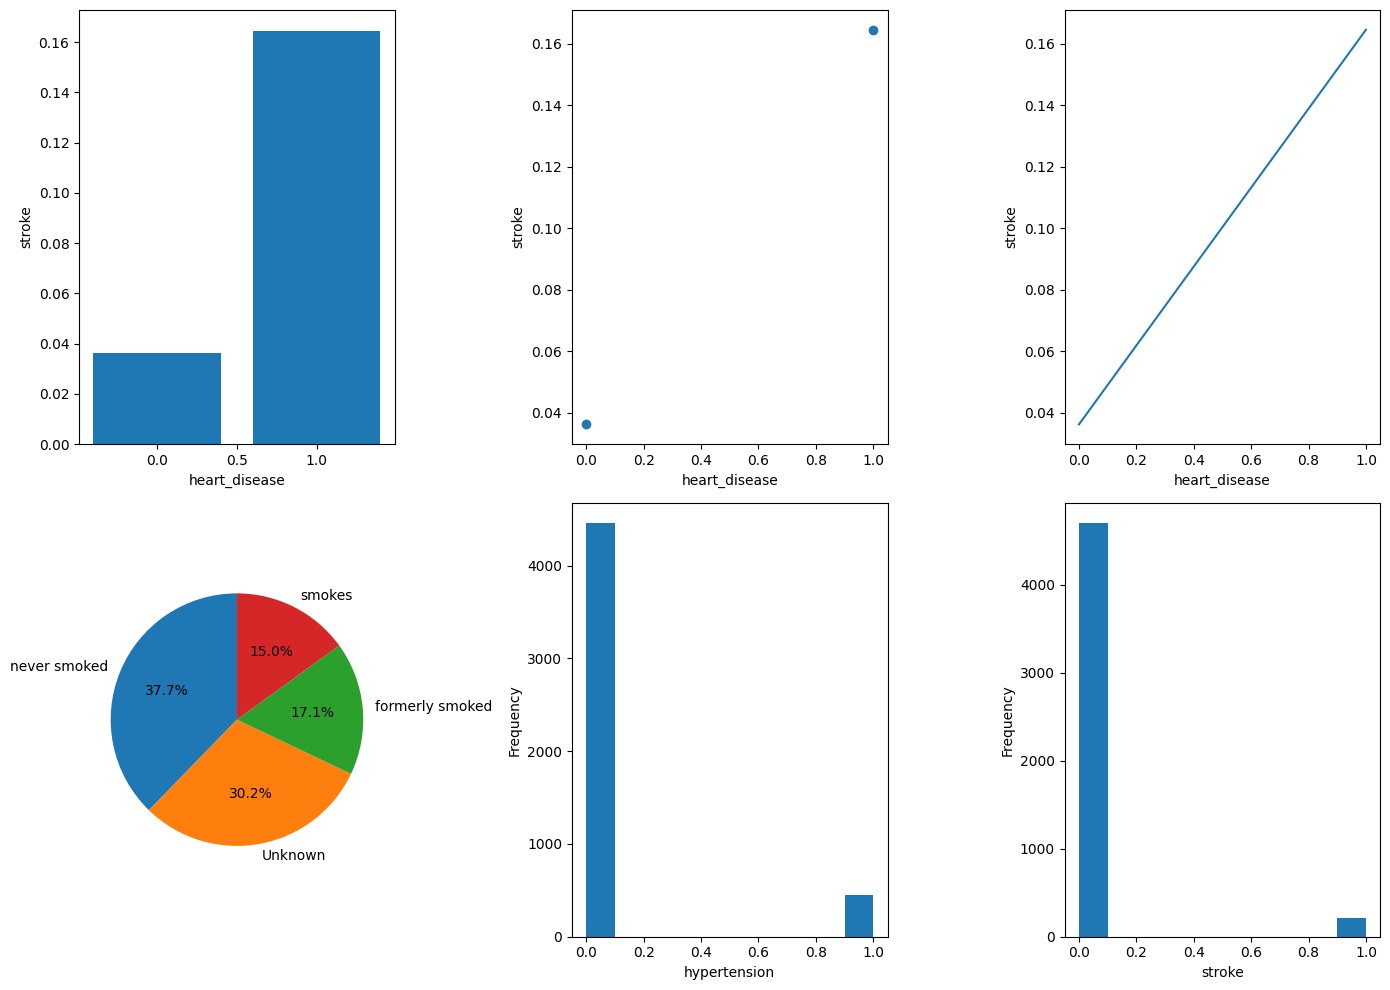

In [31]:
import matplotlib.pyplot as plt
grouped = df.groupby('heart_disease')['stroke'].mean().reset_index()
gender_grouped = df.groupby('age').size()
plt.figure(figsize=(14,10))

# Bar Chart
plt.subplot(2,3,1)
plt.bar(grouped['heart_disease'], grouped['stroke'])
plt.xlabel("heart_disease")
plt.ylabel("stroke")

# Scatter Chart
plt.subplot(2,3,2)
plt.scatter(grouped['heart_disease'], grouped['stroke'])
plt.xlabel("heart_disease")
plt.ylabel("stroke")

# Line Chart
plt.subplot(2,3,3)
plt.plot(grouped['heart_disease'], grouped['stroke'])
plt.xlabel("heart_disease")
plt.ylabel("stroke")

# Pie Chart
plt.subplot(2,3,4)
plt.pie(
    smoking_status,
    labels=smoking_status.index,
    autopct='%1.1f%%',
    startangle=90
)

# Histogram
plt.subplot(2,3,5)
plt.hist(df['hypertension'], bins=10)
plt.xlabel("hypertension")
plt.ylabel("Frequency")

# Histogram
plt.subplot(2,3,6)
plt.hist(df['stroke'], bins=10)
plt.xlabel("stroke")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [10]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
x_train

,age,hypertension,heart_disease,avg_glucose_level,bmi
3565,40.0,0,0,65.77,31.2
898,59.0,0,0,81.64,32.8
2707,57.0,0,0,217.40,36.6
4198,81.0,0,0,71.18,23.9
2746,65.0,0,0,95.88,28.5
...,...,...,...,...,...
4613,19.0,0,0,89.30,22.1
511,51.0,0,0,82.93,29.7
3247,53.0,0,0,90.65,22.1
3946,11.0,0,0,93.51,20.8


In [12]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [13]:
model = RandomForestClassifier()

In [14]:
model.fit(x_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [15]:
y_predict=model.predict(x_test)

In [16]:
mse=mean_squared_error(y_test,y_predict)
mae=mean_absolute_error(y_test,y_predict)
r2=r2_score(y_test,y_predict)
print("Mean Absolute Error:",mae)
print("Mean Squared Error:",mse)
print("R-squared:",r2)
print('Accuracy Score:', accuracy_score(y_test, y_predict))

Mean Absolute Error: 0.0539714867617108
Mean Squared Error: 0.0539714867617108
R-squared: -0.05705059203444596
Accuracy Score: 0.9460285132382892


In [17]:
import seaborn as sns

In [18]:
cm=confusion_matrix(y_test,y_predict)

<Axes: >

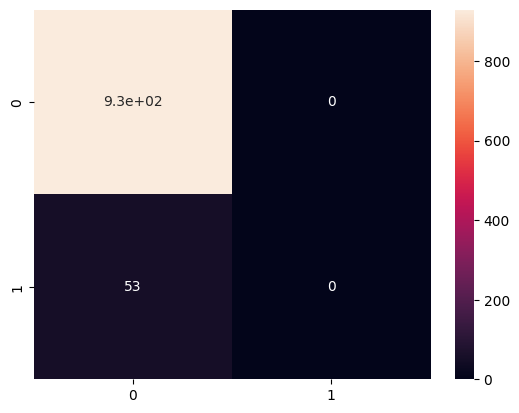

In [19]:
sns.heatmap(cm,annot=True)